### Загрузка необходимых библиотек

In [29]:
from sklearn.datasets import fetch_lfw_people #набор данных с лицами
from PIL import Image
from sklearn.svm import SVC #метод опорных векторов
import matplotlib.pyplot as plt #библиотека для графиков
from sklearn.model_selection import train_test_split #для тестирования распозавания лиц
from sklearn.model_selection import GridSearchCV #для поиска по сетке
from sklearn.metrics import classification_report  #для тестирования распозавания лиц
from sklearn.metrics import confusion_matrix #для формирования матрицы различий
from sklearn.decomposition import PCA #для предварительной обработки данных и уменьшения размера признаков методом главных компонент

### Загрузка данных для классификации из наборов данных библиотеки Scikit-Learn

In [32]:
dataset = fetch_lfw_people(min_faces_per_person=40) #для каждого человека из набора данных должно быть минимум 40 фотографий
n_samples, h, w = dataset.images.shape
X = dataset.data
n_features = X.shape[1]
y = dataset.target
target_names = dataset.target_names
n_classes = target_names.shape[0]
print("Размер данных для классификации:")
print("количество образцов: %d" % n_samples)
print("количество признаков: %d" % n_features)
print("количество классов: %d" % n_classes)

Размер данных для классификации:
количество образцов: 1867
количество признаков: 2914
количество классов: 19


### Разделение выборки на обучающую и тестовую в соотношении 70% / 30%

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Извлечение признаков и их уменьшение методом главных компонент

In [34]:
n_components = 150 #число главных компонент равно 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Обучение модели классификации (метод опорных векторов)

In [35]:
print("Адаптация классификатора к обучающей выборке")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Лучшие параметры классификатора:")
print(clf.best_estimator_)

Адаптация классификатора к обучающей выборке
Лучшие параметры классификатора:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


### Тестирование модели, вывод отчёта о классификации и матрицы различий

In [36]:
print("Распознавание людей на тестовом наборе данных")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Распознавание людей на тестовом наборе данных
                           precision    recall  f1-score   support

             Ariel Sharon       0.56      0.82      0.67        22
    Arnold Schwarzenegger       0.24      0.44      0.31         9
             Colin Powell       0.72      0.79      0.75        61
          Donald Rumsfeld       0.56      0.56      0.56        34
            George W Bush       0.74      0.88      0.80       161
        Gerhard Schroeder       0.65      0.67      0.66        30
  Gloria Macapagal Arroyo       0.93      0.93      0.93        15
              Hugo Chavez       0.87      0.59      0.70        22
           Jacques Chirac       0.71      0.42      0.53        12
            Jean Chretien       0.73      0.65      0.69        17
        Jennifer Capriati       0.75      0.40      0.52        15
            John Ashcroft       0.93      0.62      0.74        21
        Junichiro Koizumi       0.85      0.85      0.85        20
               

### Предсказание меток для контрольных данных

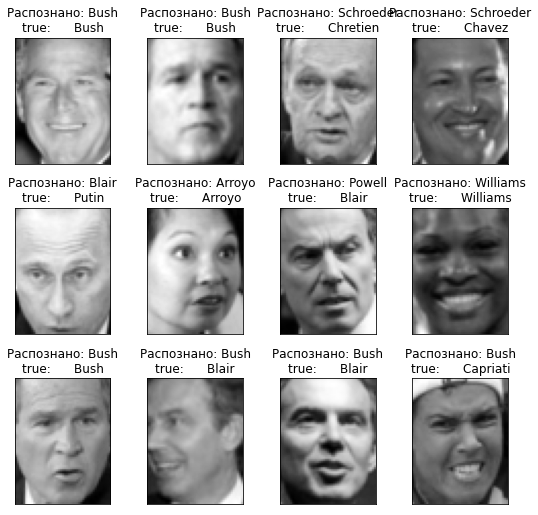

In [37]:
#Дополнительные функции для отображения результатов классификации
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Распознано: %s\ntrue:      %s' % (pred_name, true_name)
prediction_titles = [title(y_pred, y_test, target_names, i)  for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

### Классификация при числе компонент равному 100

In [38]:
n_components = 100 
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
clf = SVC(kernel='rbf', class_weight='balanced', C=1000.0, gamma=0.001) 
clf = clf.fit(X_train_pca, y_train)
print("Распознавание людей на тестовом наборе данных")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Распознавание людей на тестовом наборе данных
                           precision    recall  f1-score   support

             Ariel Sharon       0.60      0.68      0.64        22
    Arnold Schwarzenegger       0.29      0.56      0.38         9
             Colin Powell       0.78      0.82      0.80        61
          Donald Rumsfeld       0.61      0.65      0.63        34
            George W Bush       0.78      0.91      0.84       161
        Gerhard Schroeder       0.74      0.77      0.75        30
  Gloria Macapagal Arroyo       0.93      0.87      0.90        15
              Hugo Chavez       0.87      0.59      0.70        22
           Jacques Chirac       0.67      0.50      0.57        12
            Jean Chretien       0.65      0.65      0.65        17
        Jennifer Capriati       0.75      0.40      0.52        15
            John Ashcroft       0.82      0.67      0.74        21
        Junichiro Koizumi       0.89      0.85      0.87        20
               

### Классификация при числе компонент равному 200

In [39]:
n_components = 200
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
clf = SVC(kernel='rbf', class_weight='balanced', C=1000.0, gamma=0.001) 
clf = clf.fit(X_train_pca, y_train)
print("Распознавание людей на тестовом наборе данных")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Распознавание людей на тестовом наборе данных
                           precision    recall  f1-score   support

             Ariel Sharon       0.59      0.77      0.67        22
    Arnold Schwarzenegger       0.40      0.67      0.50         9
             Colin Powell       0.70      0.72      0.71        61
          Donald Rumsfeld       0.58      0.53      0.55        34
            George W Bush       0.71      0.90      0.79       161
        Gerhard Schroeder       0.72      0.77      0.74        30
  Gloria Macapagal Arroyo       1.00      0.87      0.93        15
              Hugo Chavez       1.00      0.64      0.78        22
           Jacques Chirac       0.43      0.25      0.32        12
            Jean Chretien       0.71      0.59      0.65        17
        Jennifer Capriati       0.56      0.33      0.42        15
            John Ashcroft       0.76      0.62      0.68        21
        Junichiro Koizumi       0.84      0.80      0.82        20
               

### Результаты при классификации с разным числом главным компонент практически одинаковы.